In [51]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sn
from adjustText import adjust_text # Evite les labels superposés

In [74]:
# plot
from matplotlib.lines import Line2D
def volcano_plot(data):
    
    data["-log10"] = -(np.log10(data["padj"]))
    data = pd.DataFrame.dropna(data)
    data["diffexpressed"] = "NO"
    # if log2Foldchange > 2 and pvalue < 0.05, set as "UP" 
    data["diffexpressed"][(data["log2FoldChange"] > 2) & (data["padj"] < 0.05)] = "UP"
    # if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] < -2) & (data["padj"] < 0.05)] = "DOWN"
    data["diffexpressed"][(data["log2FoldChange"] > -1) & (data["log2FoldChange"] < 1)] = "NONE"
    data["label"] = np.nan
    data["label"][data["diffexpressed"] != "NO"] = data["symbol"][data["diffexpressed"] != "NO"]
    mycolors = []
    labels={'UP': 'red','DOWN':'blue','NO':'grey'}
    for i in data['diffexpressed']:
        if i == 'NONE':
            mycolors.append('white')
        elif i == 'UP':
            mycolors.append('red')
        elif i == 'DOWN':
            mycolors.append('blue')
        elif i == "NO":
            mycolors.append('grey')
    
    fig, ax = plt.subplots(figsize=(15,10))

    x = data['log2FoldChange']
    y = data['-log10']
    n = data["symbol"]
    texte = []

    ax.scatter(x, y, c=mycolors)

    for i, txt in enumerate(n):
        if (x.iloc[i] > 5 and y.iloc[i] > 8) or (x.iloc[i] < -5 and y.iloc[i] > 8):
            texte += [ax.text(x.iloc[i], y.iloc[i],txt)]

    ax.set_xlabel("log2FoldChange",fontsize=22)
    ax.set_ylabel("-log10",fontsize=22)
    legend_elements = [Line2D([0], [0], marker='o',color='w', label='UP',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Down',markerfacecolor='blue', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='NO',markerfacecolor='grey', markersize=15)]
    ax.legend(handles=legend_elements, title="Expression", loc="upper left")
    adjust_text(texte)
    return plt.show()

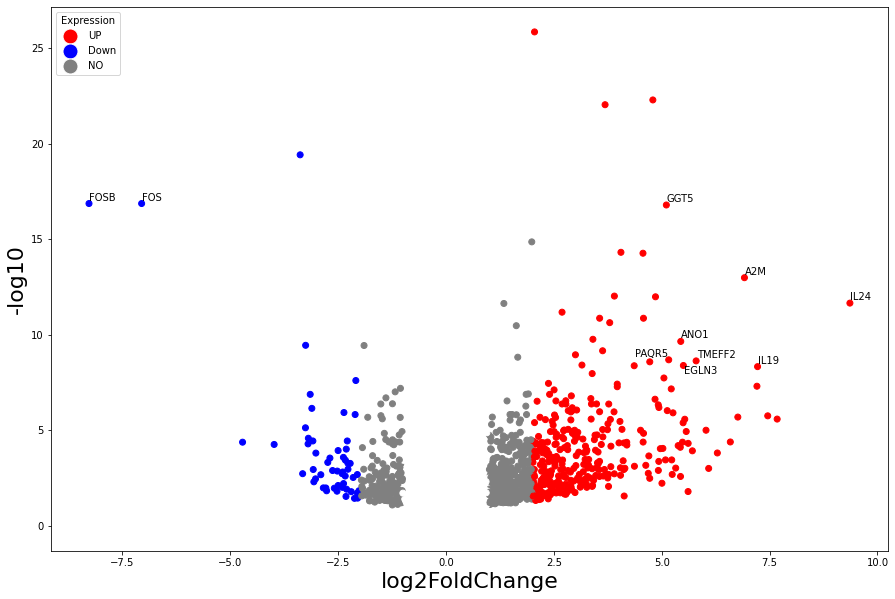

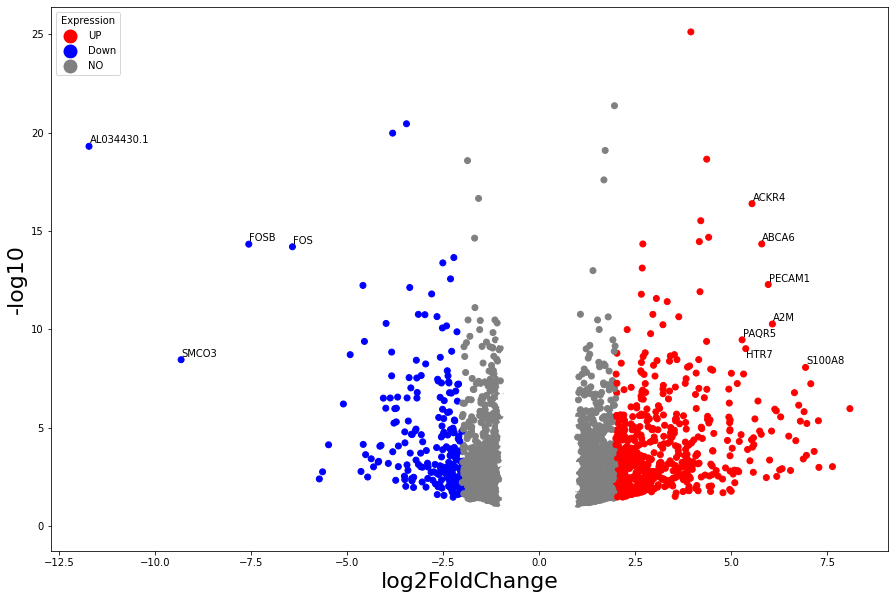

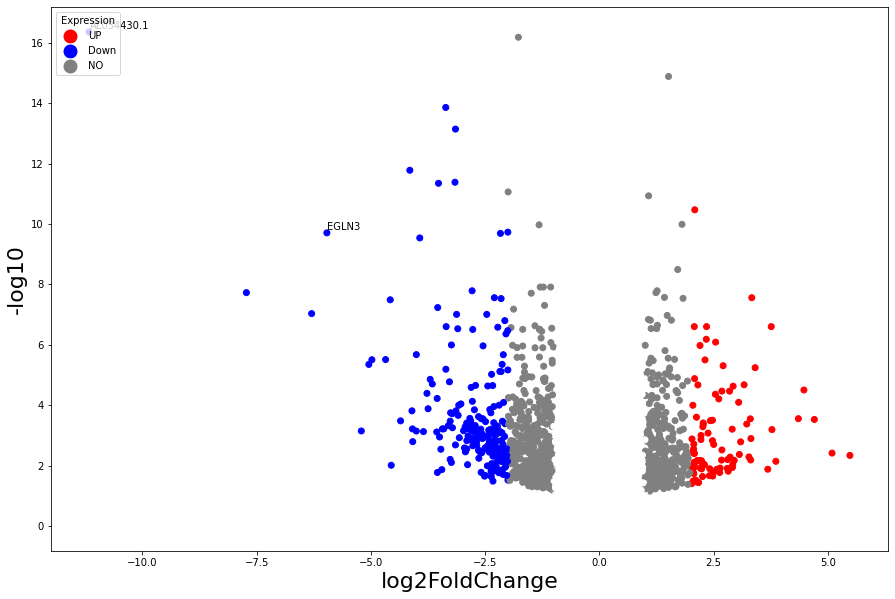

In [78]:
data1 = pd.read_csv("Transcriptomic/all_de_j2_vs_j0_allgenes.txt", sep='\t') # fichier excel sous le format "ANSI" -> 
#sous excel on transforme on remplace les virgules des séparateurs de décimal par des points 
#pour les calculs sur le DataFrame et on enregistre en fichier txt pour l'encodage 'utf-8' 
data2 = pd.read_csv('Transcriptomic/all_de_j4_vs_j0_allgenes.txt', sep='\t')
data3 = pd.read_csv('Transcriptomic/all_de_j4_vs_j2_allgenes.txt', sep='\t')
volcano_plot(data1)
volcano_plot(data2)
volcano_plot(data3)